<h1 style="font-size: 50px; color:#ff4d4d;text-align: center;
"> Salary prediction data set</h1>


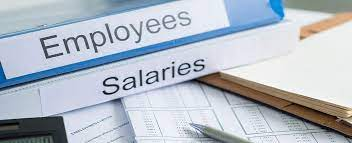

This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.
Columns:

Age: This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.
from this dataset i decided to find wheather the Age of Employee is related with other factors in the dataset.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split 

### Reading data set

In [2]:
df=pd.read_csv("Salary Data.csv")
df.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
260,NaN,NaN,NaN,NaN,NaN,NaN
59,35.0,Male,Master's,Product Manager,7.0,105000.0
268,33.0,Male,Bachelor's,Junior Operations Manager,4.0,60000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
142,33.0,Male,Bachelor's,Junior Software Developer,5.0,50000.0
314,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
67,31.0,Female,Bachelor's,Customer Service Representative,5.0,45000.0
121,53.0,Male,Master's,Director of Marketing,25.0,180000.0
208,47.0,Male,Master's,Director of Finance,20.0,170000.0
97,26.0,Male,Bachelor's,Junior Software Developer,1.0,35000.0


### Describe the dataset and make it transverse

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


### Data types in the data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


### Checking null values

In [5]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

### Dropping null values

In [6]:
df.dropna(inplace=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


### Finding the no of rows and columns in the data set

In [7]:
df.shape

(373, 6)

### Using label Encoder to convert value into numeric from categorical

In [9]:
L=LabelEncoder()
df["Gender"]=L.fit_transform(df.Gender)

### Rename columns Education Level,Job Title,Years of Experience to avoide space

In [10]:
df.rename(columns={'Education Level':'EducationLevel', 'Job Title':'JobTitle', 'Years of Experience':'YearsofExperience'}, inplace=True)

### Finding Details of  Employess Have PhD Qualification and JobTitle as Senior Business Analyst

In [11]:
edu_level =df.query('EducationLevel=="PhD" & JobTitle=="Senior Business Analyst"')
edu_level

,Age,Gender,EducationLevel,JobTitle,YearsofExperience,Salary
338,44.0,0,PhD,Senior Business Analyst,15.0,150000.0
362,44.0,0,PhD,Senior Business Analyst,15.0,150000.0
374,44.0,0,PhD,Senior Business Analyst,15.0,150000.0


### Finding Details of Mens who Have PhD Qualification

In [12]:
edu_level =df.query('EducationLevel=="PhD" & Gender ==1')
edu_level

,Age,Gender,EducationLevel,JobTitle,YearsofExperience,Salary
2,45.0,1,PhD,Senior Manager,15.0,150000.0
9,38.0,1,PhD,Senior Scientist,10.0,110000.0
17,39.0,1,PhD,Senior Engineer,12.0,115000.0
34,46.0,1,PhD,Senior Manager,20.0,170000.0
48,38.0,1,PhD,Senior Scientist,11.0,120000.0
57,43.0,1,PhD,Senior Engineer,17.0,140000.0
63,47.0,1,PhD,Senior Data Scientist,21.0,180000.0
72,45.0,1,PhD,Research Director,16.0,190000.0
83,52.0,1,PhD,Chief Technology Officer,24.0,250000.0
90,36.0,1,PhD,Principal Scientist,11.0,120000.0


<h1 style="font-size: 35px; color:#ff8533;text-align: center;
">EXPLORATORY DATA ANALYSIS</h1>

<h1 style="font-size: 25px; color:#000000;text-align: center;
">BIVARIATE ANALYSIS</h1>

### checking  which Education level  have the largest salary using pie chart and barplot

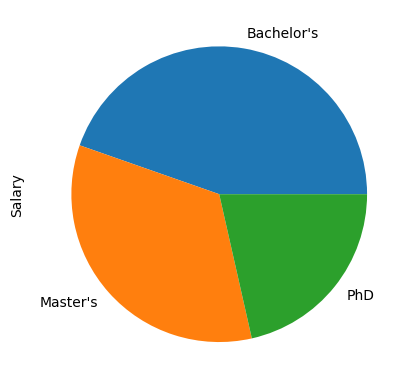

In [13]:
Edu_salary = df.groupby(['EducationLevel'])['Salary'].sum()
Edu_salary.plot.pie();

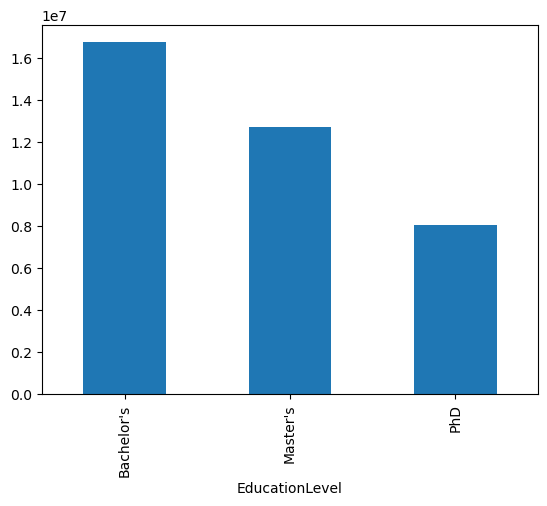

In [14]:
Edu_salary.plot.bar();

###  line plot showing years of experience vs salary

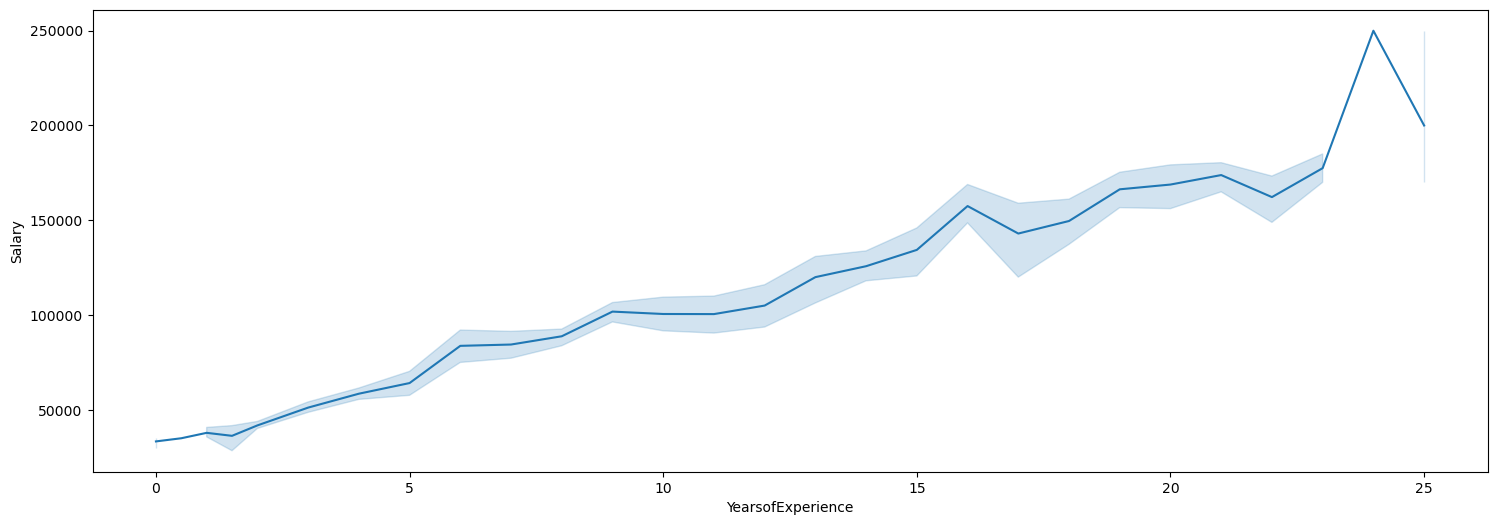

In [15]:
plt.figure(figsize=(18,6))
sns.lineplot(x='YearsofExperience', y='Salary', data=df)
plt.show()

###  Plotting pairplot with the data set

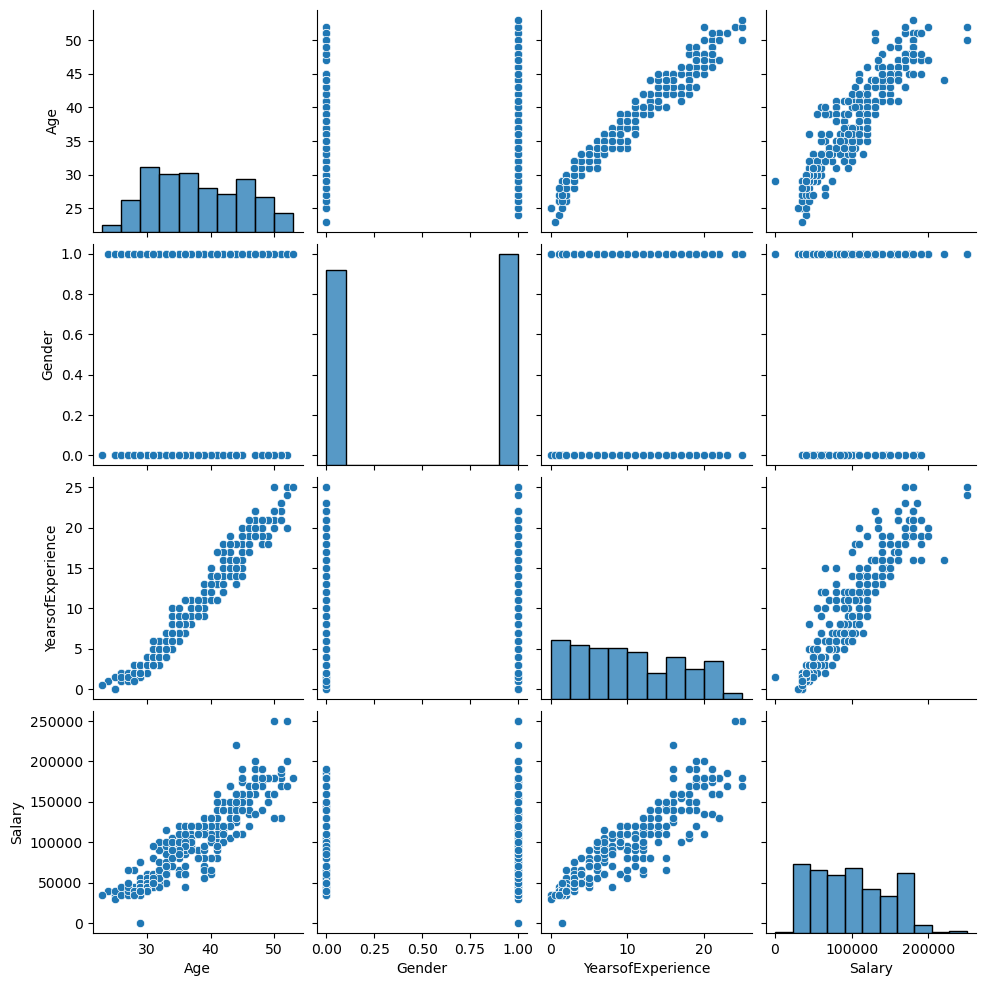

In [16]:
sns.pairplot(data=df)
plt.show()

<h1 style="font-size: 25px; color:#000000;text-align: center;
">UNIVARIATE ANALYSIS</h1>

### Histplot

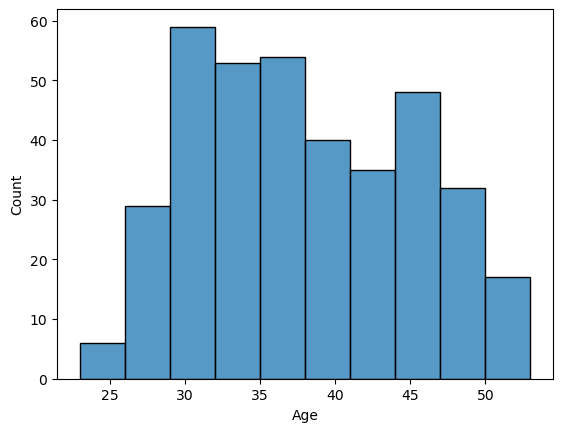

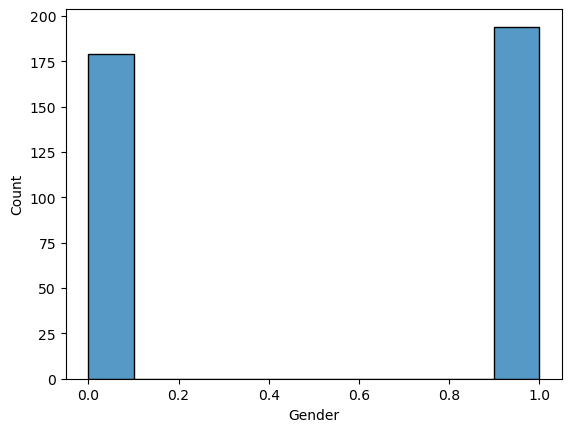

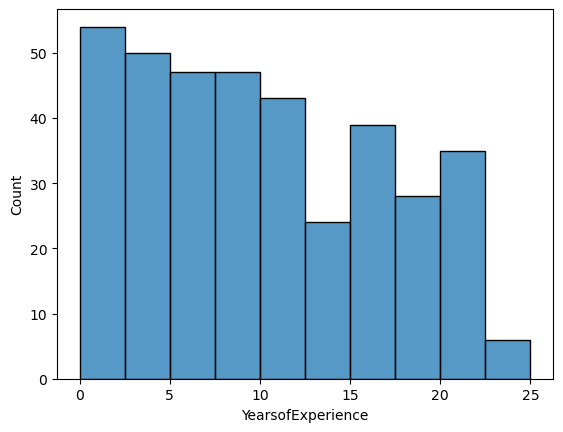

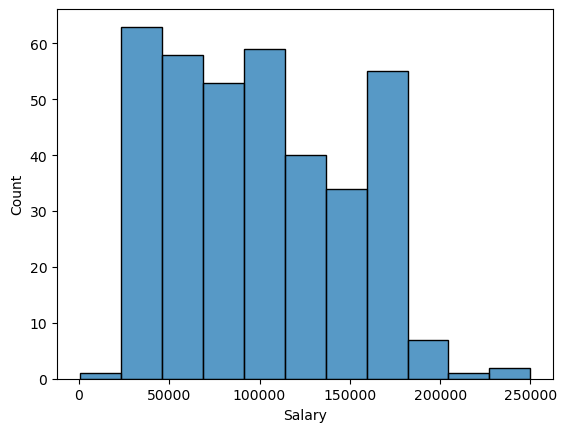

In [17]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show()

### kdeplot

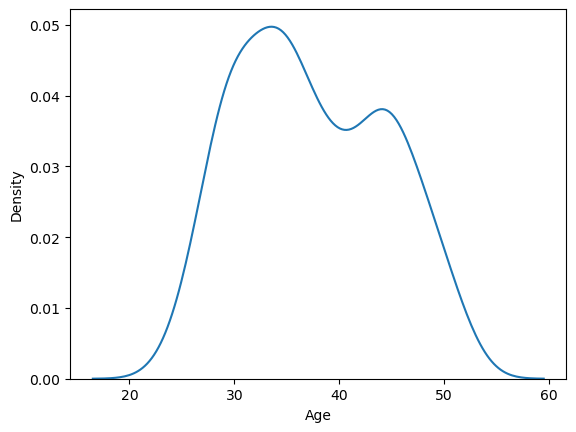

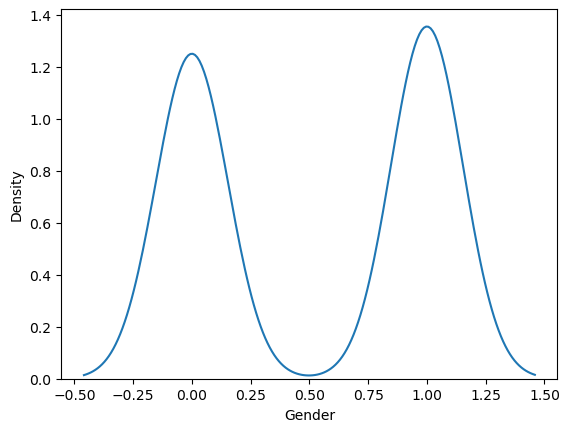

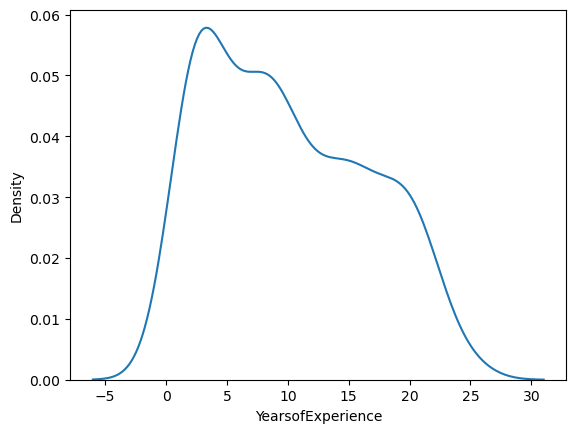

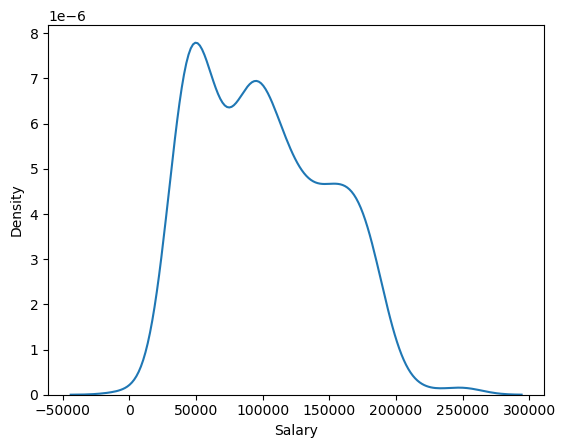

In [18]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.kdeplot(x =df[i] )
        plt.show()

### boxplot

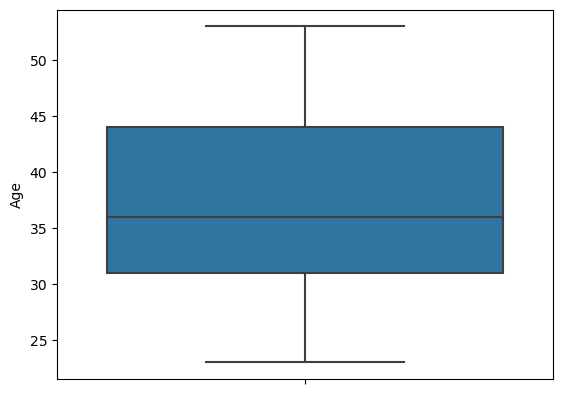

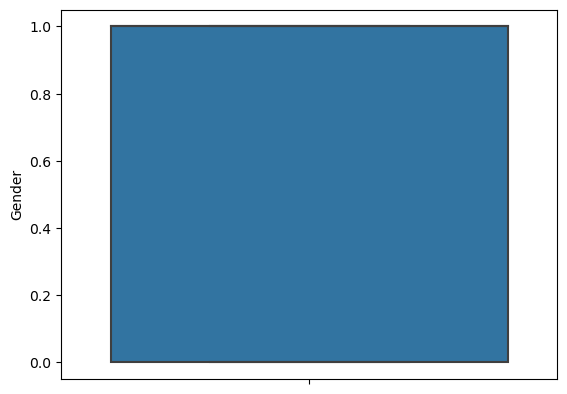

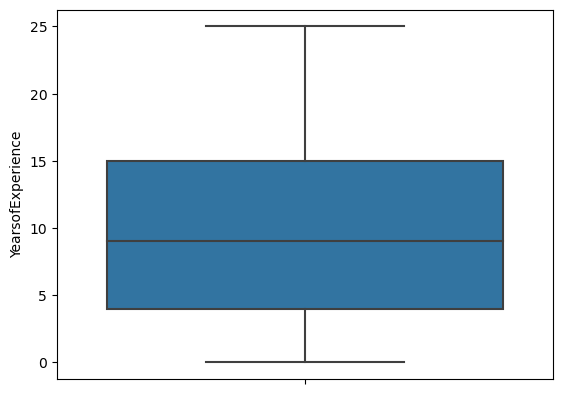

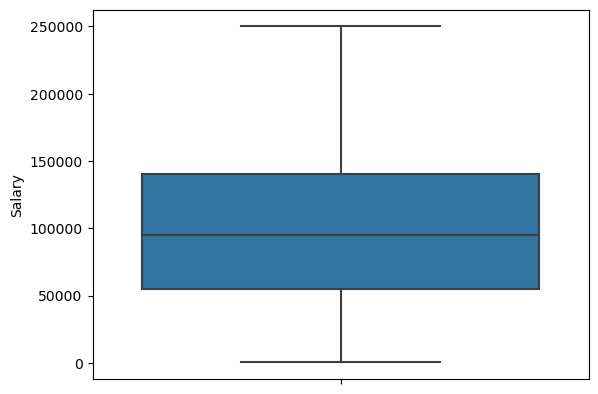

In [19]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.boxplot(y = df[i])
        plt.show();

### After finding that outliers are notpresent plotting heat map for checking corelation

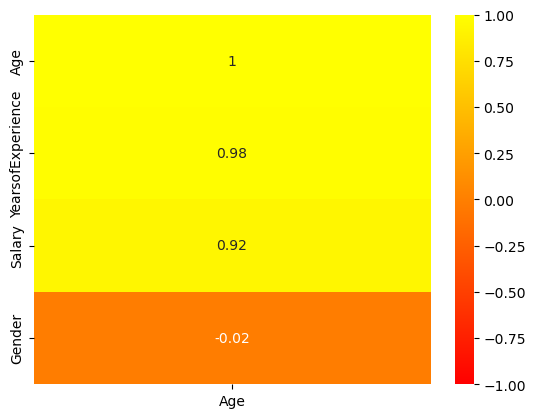

In [20]:
sns.heatmap(df.corr()[["Age"]].sort_values(by="Age", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn");

### Then  take Gender,Salary,Years of Experience as x and Age  as  y for prediction purpose

In [21]:
x= df[[ 'Gender', 'Salary', 'YearsofExperience']].values
y=df[['Age']].values

### Then i take StandardScaler for scalling and then i done cross validation to find out the best model

In [22]:
sc=StandardScaler()
x = sc.fit_transform(x)

In [23]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [24]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1.4299296847179612
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1.4282719576589047
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  1.431230875563153
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1.4780098506471069
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1.3552322334459759
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.4822566253964138
*******************************************

## Model fitting

In [25]:
model=GradientBoostingRegressor()

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [27]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [33]:
training_score=model.score(x_train, y_train)*100
testing_score=model.score(x_test, y_test)*100
score= r2_score(y_test, model.predict(x_test))*100
mae=mean_absolute_error(y_test, model.predict(x_test))
mse=mean_squared_error(y_test, model.predict(x_test))
rmse=np.sqrt(mse)

In [34]:
rmse

1.1771356931223411

In [35]:
y_pred= model.predict(x)
y_pred

array([32.44028972, 30.49400978, 44.24280533, 35.41216929, 51.10081105,
       29.37230322, 40.11196917, 31.84608826, 25.51861796, 37.6544419 ,
       29.67707127, 44.82816505, 33.50936168, 42.84281873, 27.93396067,
       42.88395792, 34.61137361, 39.79966207, 25.08231032, 49.34612651,
       32.86074261, 47.41913517, 29.29497995, 36.68803628, 42.00297107,
       29.78613   , 39.66192191, 25.41254083, 43.3791742 , 32.89884148,
       50.43817534, 31.56505599, 29.67707127, 37.8676818 , 46.82110653,
       27.87655491, 35.41216929, 41.96150718, 25.64764336, 47.5317384 ,
       32.86074261, 46.65931661, 30.65072297, 35.59525648, 42.21499898,
       28.62750852, 32.41085752, 44.45820868, 38.61238902, 24.92880088,
       50.30713492, 34.23329845, 39.5472833 , 47.41913517, 30.74646559,
       35.95832401, 29.46198076, 43.69009419, 31.56505599, 34.22917218,
       50.0663212 , 30.5930838 , 39.37305142, 48.31957001, 26.44730006,
       37.56415927, 45.59009641, 31.61189153, 35.09421698, 45.75

## Prediction

In [36]:
OUTPUT=pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,32.0,32.440290
1,28.0,30.494010
2,45.0,44.242805
3,36.0,35.412169
4,52.0,51.100811
...,...,...
368,35.0,35.441588
369,43.0,45.868504
370,29.0,28.627509
371,34.0,34.248650


## plotting scatterplot to check co relation

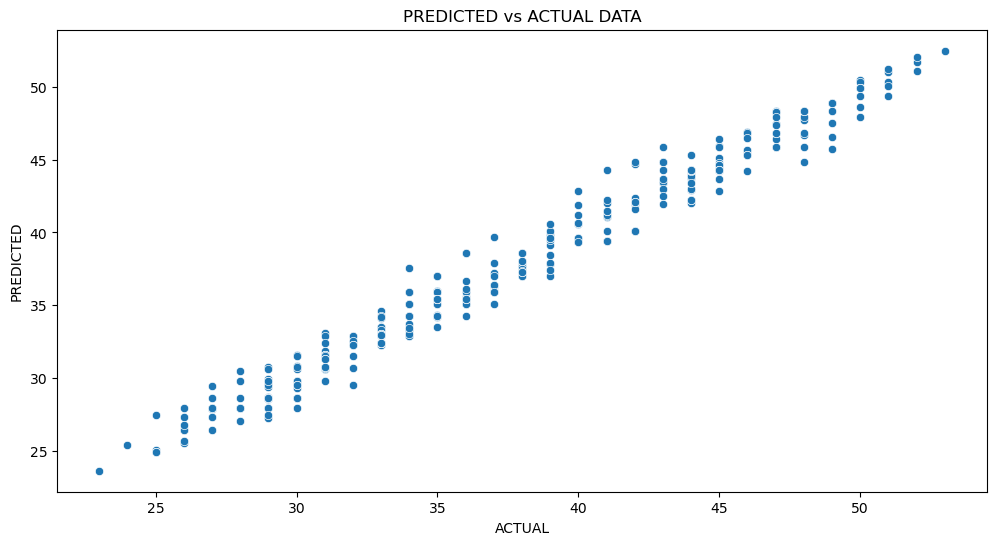

In [37]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED vs ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");

## Conclusion

From the data set i found there is high corelation is existing in the dataset and the Employee age is related with other factors in the dataset